In [1]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#Quick Inference Analysis
In this notebook we explore ana.csv stored by tf/ana.py.
First let's read-in csv file + define a list of names for "labels" we stored.

In [2]:
# labels are defined in io.cfg or io_test.cfg [2212,11,13] => [proton,electron,muon]
LABELS=['proton','electron','muon']
# we use pandas, analysis tool widely used in data science, to do our analysis
import pandas
df = pandas.read_csv('ana.csv')

pandas.read_csv function reads-in csv file and put into pandas "DataFrame", a table format data representation.
Let's take a quick look at the table. One way is to call DataFrame.describe function

In [3]:
df.describe()

,entry,label,prediction,softmax_pred,softmax0,softmax1,softmax2
count,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03,9.000000e+03,9.000000e+03
mean,4499.500000,1.000000,0.989111,0.988665,3.398163e-01,3.319966e-01,3.281871e-01
std,2598.220545,0.816542,0.817829,0.057003,4.687514e-01,4.658070e-01,4.617829e-01
min,0.000000,0.000000,0.000000,0.382004,0.000000e+00,0.000000e+00,0.000000e+00
25%,2249.750000,0.000000,0.000000,0.999913,5.930925e-09,4.458843e-08,1.259270e-13
50%,4499.500000,1.000000,1.000000,1.000000,1.076945e-04,9.201330e-05,2.447120e-06
75%,6749.250000,2.000000,2.000000,1.000000,9.999910e-01,9.999980e-01,9.991750e-01
max,8999.000000,2.000000,2.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00


which lists columns of the table = variables defined in the csv file header with calculated basic statistical quantities (mean, variance, etc. in each row).

Assuming you analyzed inference_9k.root (check in your io_test.cfg), you should have 9000 rows in each column. ana.py should have stored following items:
* entry ... a unique event identifier (TTree entry number) in inference_9k.root.
* label ... the correct particle label
* prediction ... the label with the highest softmax-probability calculated by the network
* softmax_pred ... the highest softmax-probability (should be identical to one of the followings)
* softmax0 ... the softmax-probability for being PDG=2212 (proton)
* softmax1 ... the softmax-probability for being PDG=11 (electron)
* softmax2 ... the softmax-probability for being PDG=13 (muon)


One of many useful features of pandas.DataFrame you will be using is a slicing method called "query".
This function is used to "slice" data frame (i.e. apply analysis cuts to extract subset of data).
Here's an example of accessing each particle subset.

In [4]:
for index,label in enumerate(LABELS):
    sub_df = df.query('label==%d' % index)
    print 'Found', sub_df.index.size, 'entries for a particle type', label

Found 3000 entries for a particle type proton
Found 3000 entries for a particle type electron
Found 3000 entries for a particle type muon


Each column data in DataFrame is stored in the form of pandas "Series", which in turn holds data internally as a numpy array. df.index, we used in above example, is a special column that exists in all pandas.DataFrame. It is simply a list of row numbers in the table. pandas Series has an attribute "size" that shows number of elements in the series (i.e. row count). You can access numpy array through an attribute named "values" like this:

In [5]:
# pandas Series
print type(df.entry)
# and its numpy array
print type(df.entry.values)

<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


Since columns are stored in the form of numpy array, you can directly give it to matplotlib for plotting.

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


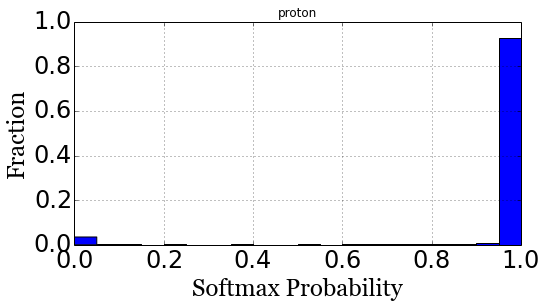

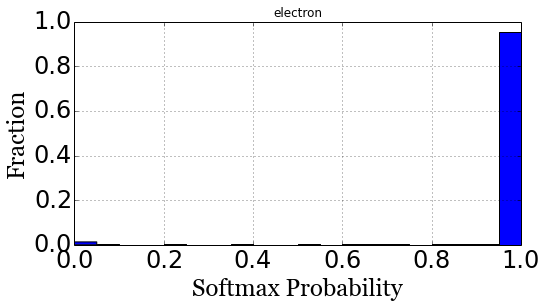

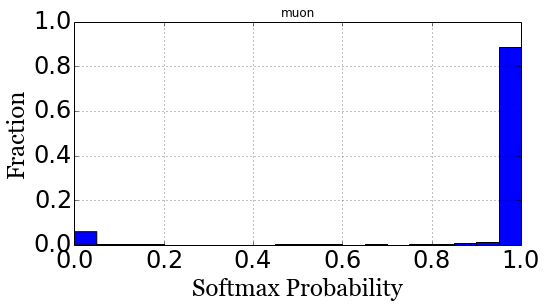

In [6]:
for index,label in enumerate(LABELS):
    fig,ax = plt.subplots(figsize=(8,4),facecolor='w')
    
    sub_df = df.query('label==%d' % index)
    
    exec('data_ptr = sub_df.softmax%d.values' % index)
    plt.hist(data_ptr, range=(0.,1.), weights=[1./sub_df.index.size]*sub_df.index.size,bins=20)
    
    plt.grid()
    ax.legend(prop={'size':40})
    plt.xlabel('Softmax Probability',fontsize=24,fontname='Georgia')
    plt.ylabel('Fraction',fontsize=24,fontname='Georgia')
    plt.title(label)
    plt.tick_params(labelsize=24)
    ax.set_ylim(0,1.)
    plt.show()
    